# Deep Learning Library in Pytorch

In [34]:
import torch
from torch.autograd import grad
from matplotlib import pyplot as plt

### Example problem

In [41]:
#x = torch.rand(1, 20)
#y = torch.rand(1, 20)
x = torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2])
y = torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6])

print(x,"\n", y)

tensor([12.4000, 14.3000, 14.5000, 14.9000, 16.1000, 16.9000, 16.5000, 15.4000,
        17.0000, 17.9000, 18.8000, 20.3000, 22.4000, 19.4000, 15.5000, 16.7000,
        17.3000, 18.4000, 19.2000, 17.4000, 19.5000, 19.7000, 21.2000]) 
 tensor([11.2000, 12.5000, 12.7000, 13.1000, 14.1000, 14.8000, 14.4000, 13.4000,
        14.9000, 15.6000, 16.4000, 17.7000, 19.6000, 16.9000, 14.0000, 14.6000,
        15.1000, 16.1000, 16.8000, 15.2000, 17.0000, 17.2000, 18.6000])


In [42]:
#learnable parameters: w and b
# y_pred = w*x + b

b = torch.rand([1], requires_grad = True)
w = torch.rand([1], requires_grad = True)

print("Initial params are: w: {}, b: {}".format(w.item(),b.item()))

#setting learning rate:
alpha = torch.tensor(0.001)

#list of loss values for plotting
loss_list = []

Initial params are: w: 0.20428138971328735, b: 0.6783518195152283


In [43]:
# run the training loop for N epochs
for epochs in range(100):
    
    #Compute avg loss for training samples
    loss = 0.0
    
    #Accumulate loss for all samples
    for j in range(len(x)):
        a = w*x[j]
        y_p = a + b
        loss += (y_p - y[j])**2
        
    #find the avg loss
    loss = loss/len(x)
    
    #adding loss to list to plot
    loss_list.append(loss.item())

    #compute gradients dL/dw and dL/db
    loss.backward()

    #perform operations whithout modifying the gradient of block
    with torch.no_grad():
        #update weights using gradient descent
        #equivalent = w1.copy_(w1 - alpha)
        w -= alpha * w.grad
        b -= alpha * b.grad

    #reset gradients for each epoch
    w.grad.zero_()
    b.grad.zero_()
    
    #display final params
    print("The params are: w: {}, b: {} and loss: {}".format(w.item(),b.item(), loss.item()))

The params are: w: 0.5976071357727051, b: 0.7004594802856445 and loss: 124.53111267089844
The params are: w: 0.7458208799362183, b: 0.7087838649749756 and loss: 17.694011688232422
The params are: w: 0.8016712665557861, b: 0.7119144201278687 and loss: 2.5237796306610107
The params are: w: 0.8227172493934631, b: 0.7130878567695618 and loss: 0.3696976602077484
The params are: w: 0.8306481242179871, b: 0.713523805141449 and loss: 0.06382987648248672
The params are: w: 0.833636999130249, b: 0.7136818766593933 and loss: 0.0203985795378685
The params are: w: 0.8347636461257935, b: 0.7137352228164673 and loss: 0.014231483452022076
The params are: w: 0.8351885080337524, b: 0.7137491106987 and loss: 0.013355705887079239
The params are: w: 0.8353489637374878, b: 0.7137480974197388 and loss: 0.013231228105723858
The params are: w: 0.8354097604751587, b: 0.7137414813041687 and loss: 0.01321343518793583
The params are: w: 0.8354330658912659, b: 0.7137327790260315 and loss: 0.013210853561758995
The p

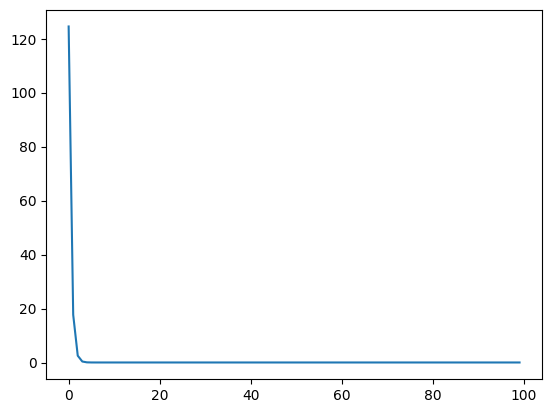

In [44]:
plt.plot(loss_list)
plt.show()

## Exercise questions

### Q1

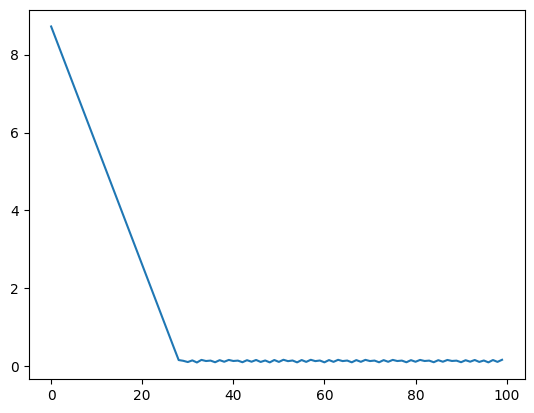

In [39]:
import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt

x = torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2])
y = torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6])
b = torch.rand([1],requires_grad = True)
w = torch.rand([1],requires_grad = True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w*x[j]
        y_p = a + b
        loss += torch.norm(y[j] - y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad

    w.grad = None
    b.grad = None

plt.plot(loss_list)

### Q2

After 0 epochs, w = 1.003000020980835,b = 1.0010000467300415,loss = 26.0
After 10 epochs, w = 1.0330002307891846,b = 1.0110005140304565,loss = 25.89999771118164
After 20 epochs, w = 1.0630004405975342,b = 1.0210009813308716,loss = 25.799999237060547
After 30 epochs, w = 1.0930006504058838,b = 1.0310014486312866,loss = 25.699996948242188
After 40 epochs, w = 1.1230008602142334,b = 1.0410019159317017,loss = 25.59999656677246
After 50 epochs, w = 1.153001070022583,b = 1.0510023832321167,loss = 25.499996185302734
After 60 epochs, w = 1.1830012798309326,b = 1.0610028505325317,loss = 25.399993896484375
After 70 epochs, w = 1.2130014896392822,b = 1.0710033178329468,loss = 25.299991607666016
After 80 epochs, w = 1.2430016994476318,b = 1.0810037851333618,loss = 25.199993133544922
After 90 epochs, w = 1.2730019092559814,b = 1.0910042524337769,loss = 25.09998893737793
Analytical Solution
After 0 epochs, w = 1.21,b = 1.07,loss = 26.0
After 10 epochs, w = 3.0319485874123804,b = 1.677316195804127,lo

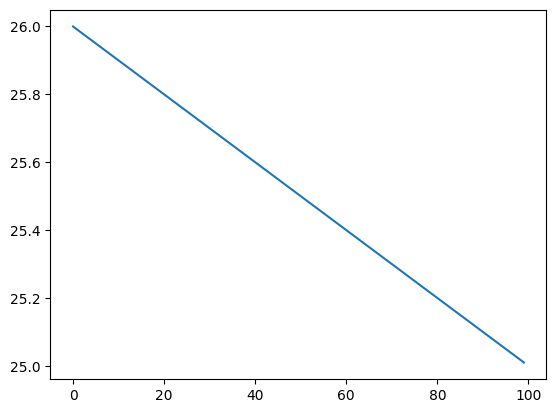

In [50]:
"""
import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt
"""

inp_x = np.array([2,4])
inp_y = np.array([20,40])

x = torch.tensor(inp_x)
y = torch.tensor(inp_y)
b = torch.tensor(1.,requires_grad = True)
w = torch.tensor(1.,requires_grad = True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w*x[j]
        y_p = a + b
        loss += torch.norm(y[j] - y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad
    
    w.grad = None
    b.grad = None
    if epochs%10==0:
            print("After {} epochs, w = {},b = {},loss = {}".format(epochs,w,b,loss))

def analytical(x,y,w,b):  
    loss = 0.0
    loss_list = []
    for epochs in range(100):
        for j in range(len(x)):
            y_p = w*x[j] + b
            loss += (y[j] - y_p)
        loss = loss/len(x)
        loss_list.append(loss.item())
        wgrad,bgrad = 0,0
        for i in range(len(x)):
            wgrad += (y_p - y[j])*(x[i])
            bgrad += (y_p - y[j])
        w -= 0.001*wgrad*2/len(x)
        b -= 0.001*bgrad*2/len(x)
        
        if epochs%10==0:
            print("After {} epochs, w = {},b = {},loss = {}".format(epochs,w,b,loss))

print("Analytical Solution")
analytical(inp_x,inp_y,1,1)

plt.plot(loss_list)

### Q3

After 0 epochs, The parameters are w=tensor([0.5984], requires_grad=True),b=tensor([0.2404], requires_grad=True), and loss =337.53863525390625
After 10 epochs, The parameters are w=tensor([0.8607], requires_grad=True),b=tensor([0.2627], requires_grad=True), and loss =330.59869384765625
After 20 epochs, The parameters are w=tensor([1.1199], requires_grad=True),b=tensor([0.2849], requires_grad=True), and loss =323.8199768066406
After 30 epochs, The parameters are w=tensor([1.3751], requires_grad=True),b=tensor([0.3071], requires_grad=True), and loss =317.2378845214844
After 40 epochs, The parameters are w=tensor([1.6255], requires_grad=True),b=tensor([0.3292], requires_grad=True), and loss =310.8979187011719
After 50 epochs, The parameters are w=tensor([1.8699], requires_grad=True),b=tensor([0.3510], requires_grad=True), and loss =304.8558654785156
After 60 epochs, The parameters are w=tensor([2.1066], requires_grad=True),b=tensor([0.3725], requires_grad=True), and loss =299.17431640625


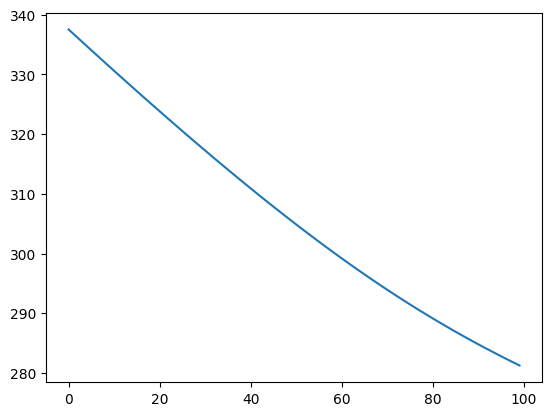

In [45]:
x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
learning_rate = torch.tensor(0.001)

class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1],requires_grad = True)
        self.b = torch.rand([1],requires_grad = True)
    def forward(self,x):
        return self.w*x + self.b
    def update(self):
        self.w -= learning_rate*self.w.grad
        self.b -= learning_rate*self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj,y_p):
    return (yj - y_p)**2

model = RegressionModel()
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x)
        loss += torch.norm(y[j] - y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        model.update()
    model.reset_grad()
    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

plt.plot(loss_list)

### Q4

[tensor([ 5.,  7., 20., 16.]), tensor([ 40., 120., 240., 210.])]
[tensor([12.]), tensor([180.])]
After 0 epochs, The parameters are w=Parameter containing:
tensor([15.3617], requires_grad=True),b=Parameter containing:
tensor([0.9341], requires_grad=True), and loss =3999.571533203125
After 10 epochs, The parameters are w=Parameter containing:
tensor([13.8716], requires_grad=True),b=Parameter containing:
tensor([1.2185], requires_grad=True), and loss =1918.517333984375
After 20 epochs, The parameters are w=Parameter containing:
tensor([13.0850], requires_grad=True),b=Parameter containing:
tensor([1.3872], requires_grad=True), and loss =3.803354024887085
After 30 epochs, The parameters are w=Parameter containing:
tensor([13.5813], requires_grad=True),b=Parameter containing:
tensor([1.6582], requires_grad=True), and loss =2210.681640625
After 40 epochs, The parameters are w=Parameter containing:
tensor([12.2117], requires_grad=True),b=Parameter containing:
tensor([1.6883], requires_grad=Tr

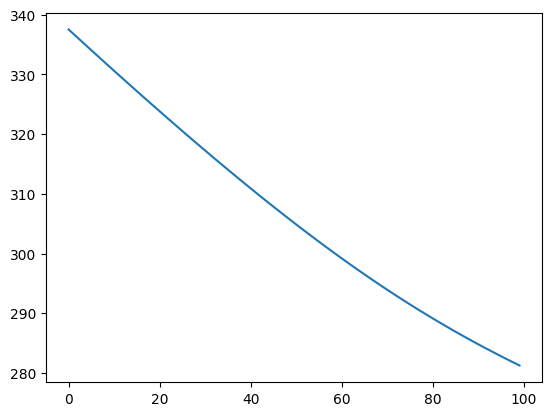

In [46]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=4,shuffle=True)

for data in iter(data_loader):
    print(data)
    
learning_rate = torch.tensor(0.001)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.003)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

plt.plot(loss_list)

### Q5

In [47]:
import torch
import numpy as np
from torch.autograd import Variable

x = Variable(torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2]))
y = Variable(torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6]))

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = torch.nn.Linear(23, 23)
    
    def forward(self,x):
        return self.linear(x)

model = RegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

for epochs in range(100):
    pred_y = model(x)
    loss = criterion(pred_y, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epochs%10==0:
        print("After {} epochs, loss ={}".format(epochs,loss.item()))

After 0 epochs, loss =395.9731140136719
After 10 epochs, loss =1.4570298390026437e-06
After 20 epochs, loss =9.094947017729282e-13
After 30 epochs, loss =2.7680272353738933e-13
After 40 epochs, loss =2.372594850620635e-13
After 50 epochs, loss =2.372594850620635e-13
After 60 epochs, loss =2.372594850620635e-13
After 70 epochs, loss =2.372594850620635e-13
After 80 epochs, loss =2.372594850620635e-13
After 90 epochs, loss =2.372594850620635e-13


### Q6

In [48]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X1,X2,Y):
        self.X1 = X1
        self.X2 = X2
        self.Y = Y
    def __len__(self):
        return len(self.X1)
    def __getitem__(self,idx):
        return self.X1[idx],self.X2[idx],self.Y[idx]

x1 = torch.tensor([3,4,5,6,2])
x2 = torch.tensor([8,5,7,3,1])
y = torch.tensor([-3.5,3.5,2.5,11.5,5.7])
dataset = MyDataset(x1,x2,y)
data_loader = DataLoader(dataset,batch_size=2,shuffle=True)

for data in iter(data_loader):
    print(data)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.w2 = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x1,x2):
        return self.w1*x1 + self.w2*x2 + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        x1,x2,labels = data
        optimizer.zero_grad()
        outputs = model(x1,x2)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w1,model.w2,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

[tensor([5, 4]), tensor([7, 5]), tensor([2.5000, 3.5000])]
[tensor([2, 3]), tensor([1, 8]), tensor([ 5.7000, -3.5000])]
[tensor([6]), tensor([3]), tensor([11.5000])]
After 0 epochs, The parameters are w=Parameter containing:
tensor([0.0879], requires_grad=True),b=Parameter containing:
tensor([0.5638], requires_grad=True), and loss =Parameter containing:
tensor([0.2868], requires_grad=True)
After 10 epochs, The parameters are w=Parameter containing:
tensor([0.4933], requires_grad=True),b=Parameter containing:
tensor([0.1219], requires_grad=True), and loss =Parameter containing:
tensor([0.3411], requires_grad=True)
After 20 epochs, The parameters are w=Parameter containing:
tensor([0.9646], requires_grad=True),b=Parameter containing:
tensor([-0.1329], requires_grad=True), and loss =Parameter containing:
tensor([0.4160], requires_grad=True)
After 30 epochs, The parameters are w=Parameter containing:
tensor([1.1810], requires_grad=True),b=Parameter containing:
tensor([-0.4890], requires_gr

### Q7

In [49]:
import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([1,5,10,10,25,50,70,75,100])
y = torch.tensor([0,0,0,0,0,1,1,1,1])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=1,shuffle=False)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.BCELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        sigmoid = torch.nn.Sigmoid()
        outputs = sigmoid(outputs)
        labels = labels.to(torch.float32)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
        loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

After 0 epochs, The parameters are w=Parameter containing:
tensor([0.9608], requires_grad=True),b=Parameter containing:
tensor([0.0872], requires_grad=True), and loss =0.0
After 10 epochs, The parameters are w=Parameter containing:
tensor([0.7045], requires_grad=True),b=Parameter containing:
tensor([0.0502], requires_grad=True), and loss =0.0
After 20 epochs, The parameters are w=Parameter containing:
tensor([0.2309], requires_grad=True),b=Parameter containing:
tensor([0.0061], requires_grad=True), and loss =0.0
After 30 epochs, The parameters are w=Parameter containing:
tensor([0.0435], requires_grad=True),b=Parameter containing:
tensor([-0.0236], requires_grad=True), and loss =0.030375629663467407
After 40 epochs, The parameters are w=Parameter containing:
tensor([0.0439], requires_grad=True),b=Parameter containing:
tensor([-0.0469], requires_grad=True), and loss =0.02991297096014023
After 50 epochs, The parameters are w=Parameter containing:
tensor([0.0443], requires_grad=True),b=Pa